In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from FCI_functions.FCI_functions import calculate_pre_score, calculate_post_score, calculate_question_score_post, calculate_question_score_pre

In [3]:
df16_111 = pd.read_excel('rawdata/2016-17 WT1 Phys 111 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df16_112 = pd.read_excel('rawdata/2016-17 WT1 Phys 112 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df14_111 = pd.read_excel('rawdata/2014-15 WT1 Phys 111 ALL Data - Shared with Chelsea (20210212).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df14_112 = pd.read_excel('rawdata/2014-15 WT1 Phys 112 ALL Data - Shared with Chelsea (20210212).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df15_111 = pd.read_excel('rawdata/2015-16 WT1 Phys 111 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df15_112 = pd.read_excel('rawdata/2015-16 WT1 Phys 112 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df17_111 = pd.read_excel('rawdata/2017-18 WT1 Phys 111 ALL Data - Shared with David (20190612).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df17_112 = pd.read_excel('rawdata/2017-18 WT1 Phys 112 ALL Data - Shared with David (20190612).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df18_111 = pd.read_excel('rawdata/2018-19 WT1 Phys 111 ALL Data - Shared with David (20190530).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df18_112 = pd.read_excel('rawdata/2018-19 WT1 Phys 112 ALL Data - Shared with David (20190527).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df19_111 = pd.read_excel('rawdata/2019-20 WT1 Phys 111 ALL Data - Shared with Maya (20211222).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df19_112 = pd.read_excel('rawdata/2019-20 WT1 Phys 112 ALL Data - Shared with Maya (20211222).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)

In [4]:
def calculate_pre_score_FDM(student):
    corr_ans = ['C' , 'D', 'B' , 'C', 'B' , 'C' , 'E', 'A', 'C' , 'D' , 'E', 'A']
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(12):
        string = "PRE Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1                
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [5]:
def calculate_post_score_FDM(student):
    corr_ans = ['C' , 'D', 'B' , 'C', 'B' , 'C' , 'E', 'A', 'C' , 'D' , 'E', 'A']
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(12):
        string = "POST Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [6]:
fdm111 = pd.DataFrame()
fdm112 = pd.DataFrame()
def FDM(df111, df112, year):
    gain_FDM = pd.DataFrame([df111.apply(calculate_post_score_FDM, axis=1) - df111.apply(calculate_pre_score_FDM, axis=1)])
    pre_FDM = pd.DataFrame([df111.apply(calculate_pre_score_FDM, axis=1)])
    
    df111['gain_FDM'] = gain_FDM.transpose()
    df111['pre_FDM'] = pre_FDM.transpose()
    
    df111.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=8)
    df111.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=8)
    plt.legend(["post", "pre"])
    plt.title("111 " + year)
    #plt.xlim(0,7)
    plt.show()
    
    df1 = df111.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "111 PRE " + year)
    fdm111["111 PRE" + year] = df1
    df1["111 POST "+ year] = df111.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)
    fdm111["111 POST" + year] = df1["111 POST "+ year]

    print(df1)

    df112.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    df112.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("112 "+ year)
    #plt.xlim(0,7)
    plt.show()

    df2 = df112.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "112 PRE " + year)
    fdm112["112 PRE" + year] = df2
    df2["112 POST " + year] = df112.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)
    fdm112["112 POST" + year] = df2["112 POST "+ year]
    
    print(df2)

    is_f111 = df111['PRE Q85']== 'A'
    df_f111 = df111[is_f111]
    
    is_f112 = df112['PRE Q85']== 'A'
    df_f112 = df112[is_f112]

    df_f111.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    df_f111.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("Female 111 " + year)
    plt.show()
    
    df3 = df111.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "111 FEMALE PRE")
    df3["111 FEMALE POST " + year ] = df111.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)

    print(df3)
    
    df_f112.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    df_f112.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("Female 112 " + year)
    plt.show()
    
    df4 = df112.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "112 FEMALE PRE")
    df4["112 FEMALE POST " + year] = df112.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)
    print(df4)


NameError: name 'zero' is not defined

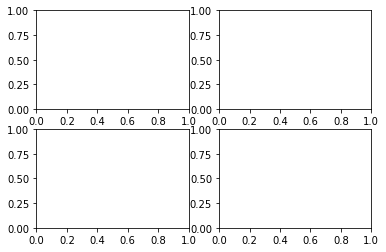

In [7]:
figure, axis = plt.subplots(2, 2)
axis[0, 0].bar(zero["gain_FDM"].value_counts().index, zero["gain_FDM"].value_counts())
axis[0, 0].set_title("Zeros")
axis[0, 1].bar(one["gain_FDM"].value_counts().index, one["gain_FDM"].value_counts())
axis[0, 1].set_title("Ones")
axis[1, 0].bar(two["gain_FDM"].value_counts().index, two["gain_FDM"].value_counts())
axis[1, 0].set_title("Twos")
axis[1, 1].bar(three["gain_FDM"].value_counts().index, three["gain_FDM"].value_counts())
axis[1, 1].set_title("Threes")

In [ ]:
figure, axis = plt.subplots(2, 2)
axis[0, 0].bar(zero["gain_FDM"].value_counts().index, four["gain_FDM"].value_counts())
axis[0, 0].set_title("Four")
axis[0, 1].bar(one["gain_FDM"].value_counts().index, five["gain_FDM"].value_counts())
axis[0, 1].set_title("Five")
axis[1, 0].bar(two["gain_FDM"].value_counts().index, six["gain_FDM"].value_counts())
axis[1, 0].set_title("Six")
axis[1, 1].bar(three["gain_FDM"].value_counts().index, seven["gain_FDM"].value_counts())
axis[1, 1].set_title("Seven")

In [8]:
#FDM(df14_111, df14_112, "2014")

zero = df14_111[df14_111['pre_FDM'] == 0]
zero["gain_FDM"].plot.hist(alpha=1, bins=zero["gain_FDM"].value_counts().size)
print(zero["gain_FDM"].value_counts())
plt(zero["gain_FDM"].value_counts())
#plot0.title("Zeros")

one = df14_111[df14_111['pre_FDM'] == 1]
one["gain_FDM"].plot.hist(alpha=1, bins=one["gain_FDM"].value_counts().size)
#print(one["gain_FDM"].value_counts())
#plot1.title("Ones")

two = df14_111[df14_111['pre_FDM'] == 2]
plot2 = two["gain_FDM"].plot.hist(alpha=0.5, bins=two["gain_FDM"].value_counts().size)
#print(two["gain_FDM"].value_counts())
#plot2.title("Twos")

three = df14_111[df14_111['pre_FDM'] == 3]
plot3 = three["gain_FDM"].plot.hist(alpha=0.5, bins=three["gain_FDM"].value_counts().size)
#print(three["gain_FDM"].value_counts())
#plot3.title("Threes")


KeyError: 'pre_FDM'

In [9]:
df14_111

,Session,Course,Lecture,Secondary,Percent Grade,Letter Grade,PRE Q1,PRE Q2,PRE Q3,PRE Q4,...,POST Q87,POST Q88,POST Q89,POST Q90,POST Q91,POST Q92,POST Q93,POST Q94,POST Q95,POST Q96
0,2014W,111,1,L02,70,B-,C,D,D,A,...,A,C,C,E,D,C,A,C,B,NaN
1,2014W,111,1,XMT,66,C+,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014W,111,1,L10,74,B,A,A,C,A,...,B,B,A,D,A,A,B,C,B,NaN
3,2014W,111,1,L02,78,B+,C,A,C,E,...,A,A,A,D,D,A,C,E,A,NaN
4,2014W,111,1,L09,60,C,C,A,C,E,...,B,B,E,A,C,C,A,D,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,2014W,111,2,L02,85,A,A,B,E,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,2014W,111,2,L07,73,B,B,C,C,A,...,B,B,B,B,E,C,A,D,A,NaN
252,2014W,111,2,L02,58,C-,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,2014W,111,2,L03,74,B,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
